In [11]:
#import data
datastore_path = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"
from azureml.data.dataset_factory import TabularDatasetFactory
ds = TabularDatasetFactory.from_delimited_files(path=datastore_path)
original_dataset = ds.to_pandas_dataframe().dropna()

In [7]:
#define clean function
import pandas as pd

def clean_data(data):
    # Dict for cleaning data
    months = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
    weekdays = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}

    # Clean and one hot encode data
    x_df = data.to_pandas_dataframe().dropna()
    jobs = pd.get_dummies(x_df.job, prefix="job")
    x_df.drop("job", inplace=True, axis=1)
    x_df = x_df.join(jobs)
    x_df["marital"] = x_df.marital.apply(lambda s: 1 if s == "married" else 0)
    x_df["default"] = x_df.default.apply(lambda s: 1 if s == "yes" else 0)
    x_df["housing"] = x_df.housing.apply(lambda s: 1 if s == "yes" else 0)
    x_df["loan"] = x_df.loan.apply(lambda s: 1 if s == "yes" else 0)
    contact = pd.get_dummies(x_df.contact, prefix="contact")
    x_df.drop("contact", inplace=True, axis=1)
    x_df = x_df.join(contact)
    education = pd.get_dummies(x_df.education, prefix="education")
    x_df.drop("education", inplace=True, axis=1)
    x_df = x_df.join(education)
    x_df["month"] = x_df.month.map(months)
    x_df["day_of_week"] = x_df.day_of_week.map(weekdays)
    x_df["poutcome"] = x_df.poutcome.apply(lambda s: 1 if s == "success" else 0)

    y_df = x_df.pop("y").apply(lambda s: 1 if s == "yes" else 0)
    
    return x_df, y_df

In [8]:
x, y = clean_data(ds)

In [18]:
x.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,57,1,0,0,1,5,1,371,1,999,...,1,0,0,0,0,1,0,0,0,0
1,55,1,0,1,0,5,4,285,2,999,...,0,1,0,0,0,0,0,0,0,1
2,33,1,0,0,0,5,5,52,1,999,...,1,0,0,0,1,0,0,0,0,0
3,36,1,0,0,0,6,5,355,4,999,...,0,1,0,0,0,1,0,0,0,0
4,27,1,0,1,0,7,5,189,2,999,...,1,0,0,0,0,1,0,0,0,0


In [20]:
original_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
2,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
3,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
4,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [17]:
y.describe()

count    32950.000000
mean         0.112049
std          0.315431
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [26]:
jobs = pd.get_dummies(original_dataset.job, prefix="job")

In [27]:
jobs.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
original_dataset.drop("job", inplace=True, axis=1)

In [30]:
original_dataset.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,57,married,high.school,no,no,yes,cellular,may,mon,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1,55,married,unknown,unknown,yes,no,telephone,may,thu,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
2,33,married,basic.9y,no,no,no,cellular,may,fri,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
3,36,married,high.school,no,no,no,telephone,jun,fri,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
4,27,married,high.school,no,yes,no,cellular,jul,fri,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [31]:
original_dataset = original_dataset.join(jobs)

In [32]:
original_dataset.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,57,married,high.school,no,no,yes,cellular,may,mon,371,...,0,0,0,0,0,0,0,1,0,0
1,55,married,unknown,unknown,yes,no,telephone,may,thu,285,...,0,0,0,0,0,0,0,0,0,1
2,33,married,basic.9y,no,no,no,cellular,may,fri,52,...,0,0,0,0,0,0,0,0,0,0
3,36,married,high.school,no,no,no,telephone,jun,fri,355,...,0,0,0,0,0,0,0,0,0,0
4,27,married,high.school,no,yes,no,cellular,jul,fri,189,...,0,1,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
x_test.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
31541,33,0,0,1,0,4,1,143,2,999,...,1,0,0,0,0,0,0,0,1,0
22948,36,0,0,1,1,4,3,173,1,999,...,0,1,0,0,1,0,0,0,0,0
30466,47,1,0,1,0,6,2,78,1,999,...,0,1,0,0,0,0,0,1,0,0
26644,53,1,0,1,0,5,2,609,2,999,...,0,1,0,0,1,0,0,0,0,0
114,45,0,0,0,0,8,4,76,1,999,...,1,0,0,0,0,0,0,1,0,0


In [46]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(C=0.7753305796763503, max_iter=200).fit(x_train, y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
accuracy = model.score(x_test, y_test)
accuracy

0.910536537994659

In [58]:
sizes = original_dataset['y'].value_counts(sort=1)

In [60]:
from matplotlib import pyplot as plt

([<matplotlib.patches.Wedge at 0x7ff57907a5c0>,
 [Text(-1.0325493888661543, 0.3792647618117602, ''),
  Text(1.0325493799888217, -0.3792647859803227, '')])

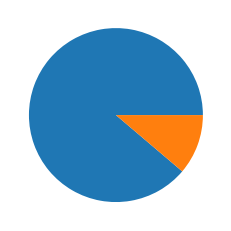

In [63]:
plt.pie(sizes)

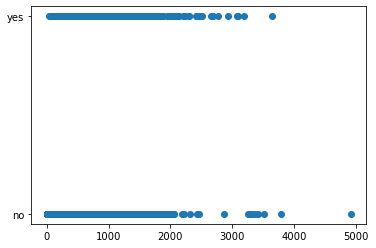

In [66]:
plt.scatter(original_dataset.duration, original_dataset.y)

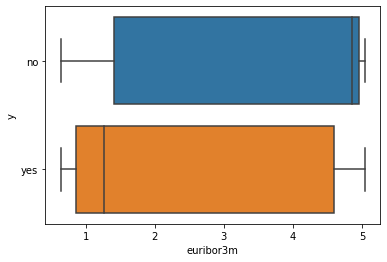

In [82]:
import seaborn as sbr
sbr.boxplot(x=original_dataset.euribor3m, y=original_dataset.y)